## Logic
* Create a batch of 100 240x240 images.
* Object size should be around 40.
* Generate tensor of images and their corresponding list of lists of list labels object.
* Draw boxes on image and generate it.
* Have a dataset class which can do all of this on the fly.

In [1]:
from chainer import dataset
import numpy as np
import matplotlib.pyplot as plt

class SquaresDataset:
    def __init__(self):
        pass
    
    def load(self):
        pass
    
    def encode_labels(self, labels):
        """
        Encodes a list of labels as y tensor
        
        Args:
            labels: List of list of boxes
            
        Returns:
            gt_loc (n,1): 
        """
        pass
    
    def generate_batch(self, n=100, h=70, w=70):
        """
        Generates a tensor of images with n randomly places squares. Images are of size 240x240.
        
        Args:
            n (int): Batch size
            h (int): Height of each square
            w (int): Height of each square
        
        Returns:
            imgs (n, 3, 240, 240): RGB image tensor
            labels: list of list of boxes for each image, each box in (tx, ty, bx, by) format
        """
        # image tensor
        imgs = np.zeros((n,3,240,240))
        labels = []

        for img in imgs:

            boxes = []
            for i in xrange(2):
                tx = np.random.randint(0, 239-w)
                ty = np.random.randint(0, 239-h)
                box = [tx,ty,tx+w,ty+h]
                img[:,ty:ty+h,tx:tx+w] = 1
                boxes.append(box)
            
            labels.append(boxes)
        
        return imgs, labels
    
    def visualize_batch(self, imgs, labels):
        """ 
        Takes a batch of images and labels and plots them
        
        Args:
            imgs (n, 3, 240, 240): Tensor of images
            labels: list of list of boxes/img, each box in (tx, ty, bx, by) format
            
        Returns:
            Nothing, really
        """
        
        for i, img in enumerate(imgs):
            
            boxes = labels[i]
            ax = plt.gca()
            ax.imshow(img[0])

            for box in boxes:
                ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3] - box[1], fill=False, color='red'))
            plt.show()
    
    def encode(self):
        pass
    
    def get_example(self, i):
        # Here we generate and encode the 
        pass

In [2]:
db = SquaresDataset()

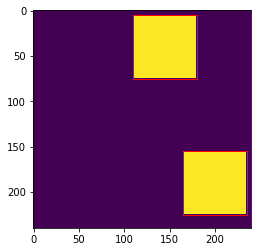

In [23]:
imgs, labels = db.generate_batch(n=1)
db.visualize_batch(imgs, labels)

## Encoding example
* Threshold each image individually and generate a gt_class probaiblity mask.
* Find all the points where the gt_class mask > 0.
* Initialize gt_loc as zeros.a
* For the positive points, find the nearest square box amongst the set of labels.
  * For each box, set its center to average to top left and bottom right.
  * Inititialize closeness as infinity.
  * Match box and set its four channels based on the offset from top left and bottom right.
* Generate selection_mask.
* Calculate classification loss.

In [24]:
""" Encoding code, add here and then move to the """
gt_class = np.zeros((imgs.shape[0], imgs.shape[2], imgs.shape[3]))
gt_class[imgs[:,0,:,:]==1]=1 # Maybe we should consider a more interior region?
gt_class = gt_class.reshape(imgs.shape[0], 1, imgs.shape[2], imgs.shape[3])

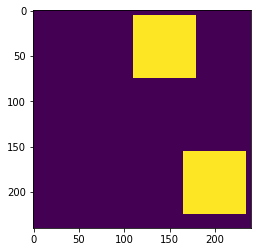

In [28]:
for i in xrange(gt_class.shape[0]):

    plt.imshow(gt_class[i,0])
    plt.show()

Ok we are able to generate the gt_class probability tensor

In [29]:
labels

[[[110, 5, 180, 75], [165, 155, 235, 225]]]

In [30]:
for gt_c, boxes in zip(gt_class, labels):
    print(gt_c, boxes)
    """ Matching code here """

(array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]), [[110, 5, 180, 75], [165, 155, 235, 225]])


In [31]:
gt_c.shape

(1, 240, 240)